In [1]:
#考虑一个用于回归任务的简单神经网络，其结构如下：

#输入层： 1 个神经元
#隐藏层： 2 个神经元，使用线性激活函数（即不使用激活函数）
#输出层： 1 个神经元，线性输出

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#sigmoid函数实现
def sigmoid(a):
  return 1/(1 + np.exp(-a))

In [4]:
#前向传播, 求y_pred的值
def forward(W1, W2, b1, b2, X):
  Z = np.dot(X, W1.T) + b1.T #shape (2,2)

  y_pred = np.dot(Z, W2.T) + b2
  return Z, y_pred

In [5]:
#求损失函数loss值
def compute_loss():
  loss = (y_pred - y_true)**2 /2
  return loss

In [6]:
#反向传导,求梯度计算
def backward(y_pred, y_true, Z, W2, X):
  dy_diff = y_pred - y_true
  b2_grad = np.mean(dy_diff, axis=0, keepdims=True)
  W2_grad = np.dot(dy_diff.T, Z)

  dz = np.dot(dy_diff, W2)
  b1_grad = np.mean(dz, axis=0, keepdims=True).T
  W1_grad = np.dot(dz, X)
  return W1_grad, W2_grad, b1_grad, b2_grad

In [7]:
#更新参数，weight,bias
def update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, lr):
    W1 -= lr * W1_grad
    W2 -= lr * W2_grad
    b1 -= lr * b1_grad
    b2 -= lr * b2_grad

    return W1, W2, b1, b2

Epoch: 1 loss: 41.0 W1_grad: [64. 80.] W2_grad: [ 55. 110.] b1_grad: [ 9. 18.] b2_grad: [9.]
Epoch: 2 loss: 2.5133 W1_grad: [ -4.26 -10.59] W2_grad: [ -5.72 -16.81] b1_grad: [-0.93 -1.86] b2_grad: [-2.06]
Epoch: 3 loss: 0.7094 W1_grad: [-1.11 -7.02] W2_grad: [-3.03 -8.82] b1_grad: [-0.49 -1.03] b2_grad: [-0.96]
Epoch: 4 loss: 0.226 W1_grad: [ 1.26 -4.13] W2_grad: [-1.17 -3.53] b1_grad: [-0.17 -0.37] b2_grad: [-0.32]
Epoch: 5 loss: 0.1493 W1_grad: [ 2.39 -2.71] W2_grad: [-0.31 -1.07] b1_grad: [-0.02 -0.04] b2_grad: [-0.03]
Epoch: 6 loss: 0.1414 W1_grad: [ 2.8  -2.17] W2_grad: [-0.02 -0.16] b1_grad: [0.04 0.08] b2_grad: [0.07]
Epoch: 7 loss: 0.1406 W1_grad: [ 2.93 -1.99] W2_grad: [0.08 0.13] b1_grad: [0.05 0.12] b2_grad: [0.1]
Epoch: 8 loss: 0.1402 W1_grad: [ 2.95 -1.93] W2_grad: [0.1  0.23] b1_grad: [0.06 0.13] b2_grad: [0.11]
Epoch: 9 loss: 0.1397 W1_grad: [ 2.95 -1.9 ] W2_grad: [0.11 0.25] b1_grad: [0.06 0.13] b2_grad: [0.11]
Epoch: 10 loss: 0.1391 W1_grad: [ 2.94 -1.89] W2_grad: [0.1

<ipython-input-8-707725739f1f>:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


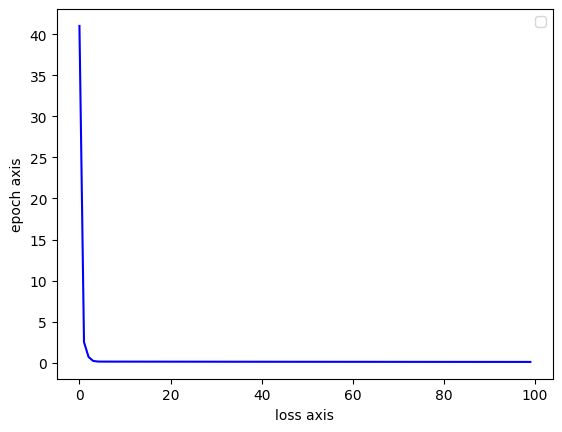

In [8]:
X = np.array([[2.0],
        [3.0]]) #ndarray (2,1)

W1 = np.array([[1.0],
        [2.0]]) #ndarray (2,1) （输入层到隐藏层）
b1 = np.array([[0.5], [1.0]]) #ndarray (2,1) （隐藏层偏置）
W2 = np.array([[1.0, 2.0]]) #ndarray (1,2) （隐藏层到输出层）
b2 = np.array([[0.5]]) #ndarray (1,1) （输出层偏置）

lr = 0.01

y_true = np.array([[5.0], [8.0]]) #ndarray (2,1)
losses = []
epochs = 100

for epoch in range(epochs):
  Z, y_pred = forward(W1, W2, b1, b2, X)
  loss = (y_pred - y_true)**2 /2

  losses.append(loss.mean())
  W1_grad, W2_grad, b1_grad, b2_grad = backward(y_pred, y_true, Z, W2, X)
  W1, W2, b1, b2 = update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, lr)

  print("Epoch:", epoch + 1,
      "loss:", np.round(loss.mean(), 4),
      "W1_grad:", np.round(W1_grad.flatten(), 2),
      "W2_grad:", np.round(W2_grad.flatten(), 2),
      "b1_grad:", np.round(b1_grad.flatten(), 2),
      "b2_grad:", np.round(b2_grad.flatten(), 2)
    )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("loss axis")
plt.ylabel("epoch axis")
plt.legend()
plt.show()